In [112]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from numpy.testing import assert_array_equal
from tqdm.notebook import tqdm
from pathlib import Path

In [85]:
from microagg1d.main import _simple_dynamic_program,_simple_dynamic_program2,  compute_cluster_cost_sorted
from microagg1d.wilber import wilber, _galil_park
from microagg1d.wilber2 import _wilber2, _galil_park2, _staggered2
import matplotlib

In [86]:
from functools import partial

In [87]:
rc_fonts = {
    "font.family": "serif",
    "font.size": 12,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
matplotlib.rcParams.update(rc_fonts)

In [23]:
def execute(ns, n_samples, methods, ks=[2, 5, 10, 20, 30, 50, 75, 100, 200, 300, 500, 1000], cutoff_time=1 ):
    
    # ensure that functions are already compiled!
    small_arr = np.random.rand(10)
    small_arr.sort()
    for method_str, function in methods.items():
        function(small_arr, 3)
    
    records = []
    skip_methods=set()
    for n in tqdm(ns, leave=False):
        skip_methods=set()
        for sample in tqdm(range(n_samples), leave=False):
            np.random.seed(sample)
            start = time.time()
            arr = np.random.rand(n)
            end = time.time()
            records.append(("sample", n, 0, sample, end - start))

            start = time.time()
            arr.sort()
            end = time.time()
            records.append(("sorting", n, 0, sample, end - start))
            for k in tqdm(ks, leave=False):
                if k > n/2:
                    continue
                for method_str, function in methods.items():
                    if method_str in skip_methods:
                        continue
                    start = time.time()
                    result1 = function(arr, k)
                    end = time.time()
                    records.append((method_str, n, k, sample, end - start))
                    if end - start > cutoff_time:
                        skip_methods.add(method_str)
    return records

In [24]:
from itertools import product
ns = [100, 1000, 10_000, 100_000]

n_samples = 10
stables = [0,1,2]
methods = {
    "wilber2" : _wilber2,
    "staggered2" : _staggered2,
    "simple+" : _simple_dynamic_program2,
    "simple" : _simple_dynamic_program,
    "galil_park2" : _galil_park2,
}

def get_stable_str(stable):
    if stable == 0:
        return ""
    return f"_stable{stable}"

methods = {
    s+get_stable_str(stable) :  partial(method, stable=stable) for (s, method), stable in product(methods.items(), stables)
}
for (s, method), stable in zip([("simple", _simple_dynamic_program)], [3]):
    methods[s+get_stable_str(stable)] =  partial(method, stable=stable) 

In [25]:
%%time

records = execute(ns, n_samples, methods)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

CPU times: total: 1min 7s
Wall time: 1min 7s


In [26]:
df = pd.DataFrame.from_records(records, columns=["name", "n", "k", "sample", "time"])

In [27]:
def get_vals(df, name, n, max_k=None, max_y=None):
    df2 = df[df["name"]==name]
    if not max_k is None:
        df2=df2[df2["k"] < max_k ]
    df2 = df2[df2["n"]==n]
    df2 = df2.drop(["name", "n", "sample"], axis=1)
    df2 = df2.groupby("k").aggregate((np.mean, np.std))
    if not max_y is  None:
        df2 = df2[df2.time["mean"]<=max_y] 
    return df2.index, df2.time["mean"], df2.time["std"], 

In [28]:
get_vals(df, "sorting", 100_000)[1][0]

0.005403470993041992

In [29]:
method_colors = {
    "wilber2" : "red",
    "wilber" : "orange",
    "galil_park2" : "lime",    
    "galil_park" : "green",
    "simple+" : "teal",
    "simple" : "blue",
    "staggered" : "brown"}

def get_colors(method_str):
    for name, color_str in method_colors.items():
        if name in method_str:
            return color_str
    return "k"

In [30]:
def my_errorbar(x, y, *args, **kwargs):
    if len(x)==0:
        return
    if np.all(pd.isnull(args[0])):
        plt.plot(x,y, **kwargs)
        return
    plt.errorbar(x,y, *args, **kwargs)

In [31]:
def get_linestyle(method_str):
    linestyle_map = {
        "stable1" : "--",
        "stable2" : ":",
        "stable3" : "-.",
        "default" : "-",
    }
    for end, style in linestyle_map.items():
        if method_str.endswith(end):
            return style
    return linestyle_map["default"]

In [114]:
def plot_external_legend(original_ax, identifier, figsize=(9, 0.5), fontsize=16):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fig, legend_ax = plt.subplots(1, 1,figsize=figsize, sharey=True)
        #fig.set_facecolor("black")
        #fig.pad_inches(0)
        fig.set_tight_layout(True)
        #legend_ax.set_facecolor("black")
        #legend_ax.set_ymargin(-0.1)
        handles, labels = original_ax.get_legend_handles_labels()
        legend_ax.axis('off')
        print(legend_ax.margins())
        #legend_ax.margins(y=0)
        fig.legend(handles, labels, loc='center', mode="expand", ncol=6,  fontsize=fontsize)
        #legend_ax.set_autoscale(enable=True, tight=True)
        fig.savefig(Path(".")/Path('figures')/f'legend_{fontsize}_{identifier}.pdf')

In [120]:
Path("./test/sth.txt").name

'sth.txt'

In [143]:
def plot(df, n, max_k = None, show_simple=False, ignores=tuple(), max_y=None, default_linestyle="-", save_name=None):
    fig = plt.figure(figsize=(5,3))
    for name in df["name"].unique():
        if name in ("sorting", "sample") or name in ignores:
            continue
        label=name
        if get_linestyle(name)!=default_linestyle:
            label=None
        my_errorbar(*get_vals(df, name, n, max_k), label=label, color=get_colors(name), linestyle=get_linestyle(name))
    plt.axhline(get_vals(df, "sorting", n)[1][0], color="k", label="sorting")
    #my_errorbar(*get_vals(df, "staggered2", n, max_k), label="staggered_stable", color=color_staggered)
    #my_errorbar(*get_vals(df, "galil_park2", n, max_k), label="galil2", color=color_staggered)
    #plt.axhline(get_vals(df, "sorting", 100_000)[1][0], color="k", label="sorting")
    plt.ylabel("runtime [s]")
    plt.xlabel("k")


    
    if max_y is not None:
        plt.gca().set_ylim(bottom=0, top=max_y)

    if not save_name is None:
        print(f"runtime for n={n:,}")
        fig.savefig(save_name, bbox_inches = 'tight')
        plot_external_legend(plt.gca(), Path(save_name).name)
    else:
        plt.title(f"runtime for n={n:,}")
        plt.legend()

In [144]:
df[df["name"]=='simple_stable3']

,name,n,k,sample,time
17,simple_stable3,100,2,0,0.000000
33,simple_stable3,100,5,0,0.000000
49,simple_stable3,100,10,0,0.000000
65,simple_stable3,100,20,0,0.000000
81,simple_stable3,100,30,0,0.000000
...,...,...,...,...,...
4638,simple_stable3,100000,10,0,0.035038
4654,simple_stable3,100000,20,0,0.099997
4670,simple_stable3,100000,30,0,0.228010
4686,simple_stable3,100000,50,0,0.655013


runtime for n=10,000
(0.05, 0.05)


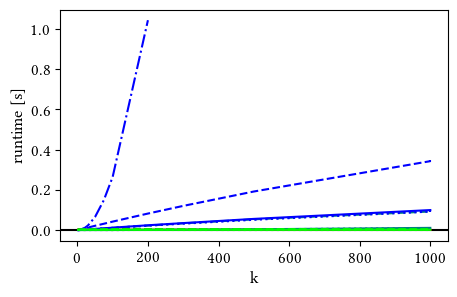

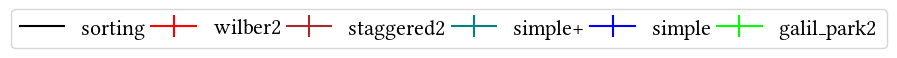

In [145]:
plot(df, 10_000, show_simple=True, ignores=("simple2_stable1",), save_name="./figures/10k_3.pdf")

runtime for n=100,000
(0.05, 0.05)


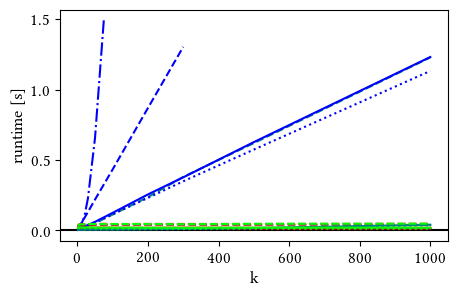

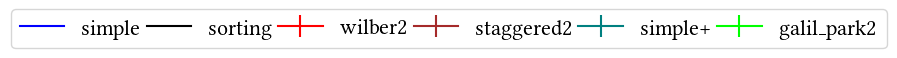

In [146]:
plot(df, 100_000, show_simple=True, ignores=("simple2_stable1",), save_name="./figures/100k_3.pdf")

runtime for n=100,000
(0.05, 0.05)


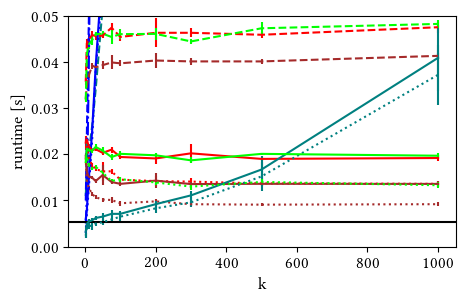

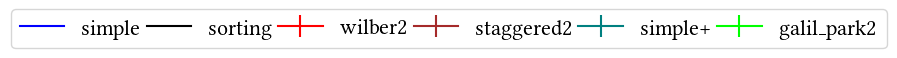

In [147]:
plot(df, 100_000, show_simple=True, max_y=0.05, save_name="./figures/100k_1.pdf")
#plt.yscale("log")

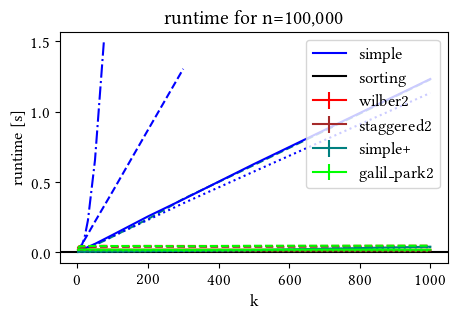

In [148]:
plot(df, 100_000, show_simple=False)

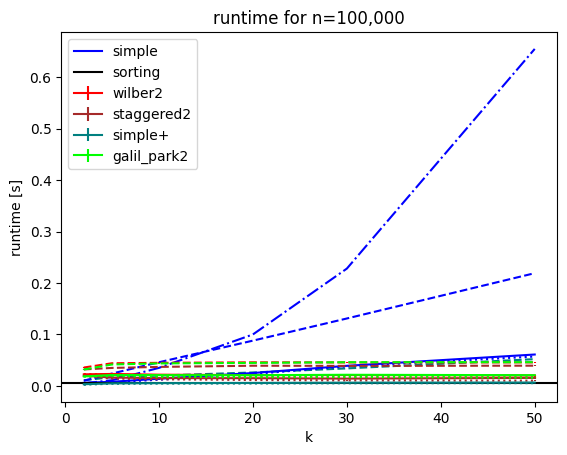

In [38]:
plot(df, 100_000, max_k=70)

In [20]:
%%time
large_methods = {
    "wilber2_stable2" : partial(_wilber2, stable=2),
    "galil_park2_stable2": partial(_galil_park2, stable=2),
    "staggered2_stable2": partial(_staggered2, stable=2),
    "simple+_stable2" : partial(_simple_dynamic_program2, stable=2),
#    "wilber_stable" : partial(wilber, stable=1),
#    "galil_park_stable": partial(_galil_park, stable=0),
}
records_large = execute([1_000_000], 10, large_methods, ks = [10,100,200,400,800, 1000, 1600, 2000, 3000, 4000, 5000])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

CPU times: total: 56.5 s
Wall time: 56.5 s


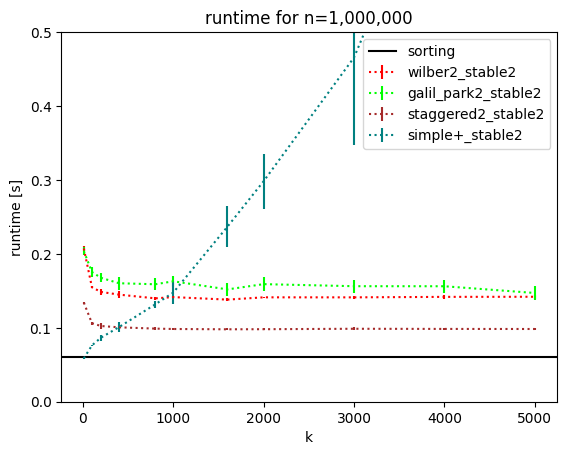

In [21]:
df_large = pd.DataFrame.from_records(records_large, columns=["name", "n", "k", "sample", "time"])
plot(df_large, 1_000_000, show_simple=True, max_y=0.5, default_linestyle=":")

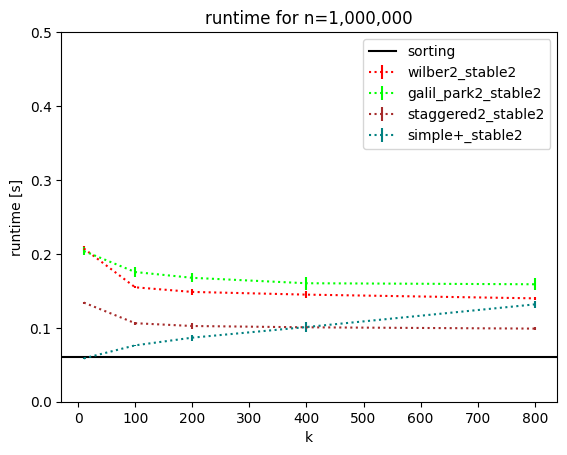

In [22]:
plot(df_large, 1_000_000, show_simple=True, max_y=0.5, max_k=1000, default_linestyle=":")